In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as sm
import scipy,scipy.stats
import math
from collections import Counter

In [8]:
df=pd.read_csv("F:/finalimarticus/project1/R_Module_Day_5.2_Data_Case_Study_Loss_Given_Default (3).csv")

In [9]:
df.info



<bound method DataFrame.info of         Ac_No  Age  Years of Experience  Number of Vehicles Gender  Married  \
0      150024   24                    5                   1      M  Married   
1      144880   31                   10                   1      F   Single   
2      133742   56                   37                   1      M  Married   
3      151282   52                   31                   1      F  Married   
4      174407   20                    3                   1      M   Single   
5      142548   29                    8                   1      M  Married   
6      183396   36                   19                   1      F   Single   
7      106838   67                   49                   1      F  Married   
8      137434   69                   48                   1      M   Single   
9      192628   16                    0                   1      F   Single   
10     154894   19                    1                   1      M   Single   
11     187293   29  

In [10]:
df.head()



,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [11]:
df.describe()


,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,149961.789339,42.328254,23.732897,2.495880,389.859718
std,28947.841061,18.280511,17.850707,0.953776,253.729433
min,100002.000000,16.000000,0.000000,1.000000,12.534521
25%,124900.500000,24.000000,6.000000,2.000000,226.434217
50%,149897.500000,42.000000,23.000000,2.000000,354.937874
75%,175019.500000,61.000000,42.000000,3.000000,488.676927
max,200454.000000,70.000000,53.000000,4.000000,3500.000000


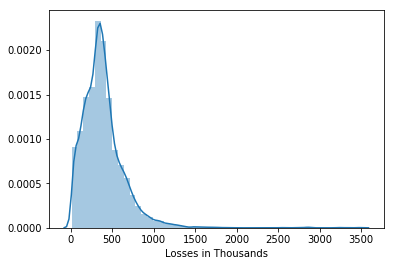

In [12]:
#to plot histogram
sns.distplot(df['Losses in Thousands'])

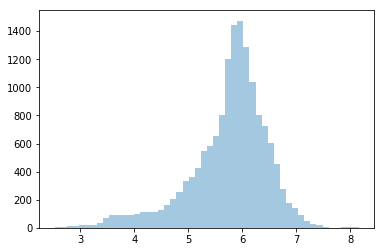

In [13]:
sns.distplot(map(math.log,df['Losses in Thousands']),kde=False,bins=50)

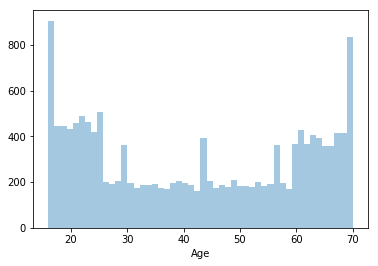

In [14]:
sns.distplot(df['Age'],kde=False,bins=50)

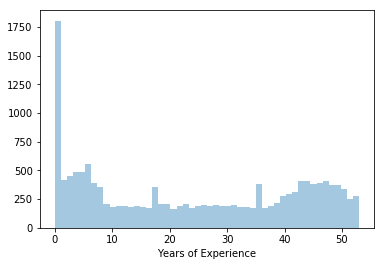

In [15]:

sns.distplot(df['Years of Experience'],kde=False,bins=50)

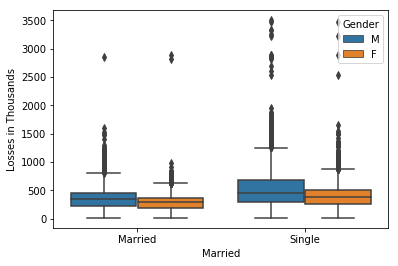

In [16]:
sns.boxplot(x='Married',y='Losses in Thousands',data=df,hue='Gender')

In [17]:
df.corr()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794
Age,0.008291,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000


In [18]:
dummy_var1=pd.get_dummies(df['Gender'],drop_first=True)
dummy_var2=pd.get_dummies(df['Married'],drop_first=True)
df_new=pd.concat([df,dummy_var1,dummy_var2],axis=1)

In [19]:
df_new.head()
df_new2=df_new.drop(['Married','Gender'],axis=1)
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [20]:
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [21]:
x=df_new2[["Age","Number of Vehicles","M","Single"]]
y=df_new2["Losses in Thousands"]

In [22]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
lm.fit(x_train,y_train)
print(lm.intercept_)
print(lm.coef_)
from sklearn import metrics
pred=lm.predict(x_test)
print metrics.mean_absolute_error(y_test,pred)
from sklearn.metrics import r2_score
print r2_score(y_test,pred)


539.656523011
[  -6.14900704   -1.79059246   97.23493268  136.7922503 ]
148.508192122
0.295052575449


In [23]:
from statsmodels.api import add_constant
x2=add_constant(x_train)
lm=sm.OLS(y_train,x2)
lm2=lm.fit()
lm2.pvalues

E:\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


const                  0.000000e+00
Age                    0.000000e+00
Number of Vehicles     4.052234e-01
M                     1.470589e-121
Single                6.953054e-233
dtype: float64

In [24]:
print lm2.summary()

                             OLS Regression Results                            
Dep. Variable:     Losses in Thousands   R-squared:                       0.305
Model:                             OLS   Adj. R-squared:                  0.304
Method:                  Least Squares   F-statistic:                     1171.
Date:                 Tue, 09 Jan 2018   Prob (F-statistic):               0.00
Time:                         21:45:33   Log-Likelihood:                -72503.
No. Observations:                10703   AIC:                         1.450e+05
Df Residuals:                    10698   BIC:                         1.451e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                539.6

In [25]:
print df_new2.head()

    Ac_No  Age  Years of Experience  Number of Vehicles  Losses in Thousands  \
0  150024   24                    5                   1           203.319595   
1  144880   31                   10                   1           402.197302   
2  133742   56                   37                   1           553.132096   
3  151282   52                   31                   1           292.430579   
4  174407   20                    3                   1           246.540576   

   M  Single  
0  1       0  
1  0       1  
2  1       0  
3  0       0  
4  1       1  


In [43]:

df_new2["AgeCategory"]= ["Young" if df_new2['Age'][i]<=28 else "MiddleAged" if 28<df_new2['Age'][i]<58 else "Old " for i in range(len(df_new2))]
df_new2['logy']=map(math.log,df_new2['Losses in Thousands'])


In [44]:
Counter(df_new2['AgeCategory'])


Counter({'MiddleAged': 5425, 'Old ': 4708, 'Young': 5157})

In [45]:
dummy_var3=pd.get_dummies(df_new2["AgeCategory"],drop_first="true")
df_new3=pd.concat([df_new2,dummy_var3],axis=1)
df_new3.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single,AgeCategory,logy,Old,Young
0,150024,24,5,1,203.319595,1,0,Young,5.314779,0,1
1,144880,31,10,1,402.197302,0,1,MiddleAged,5.996943,0,0
2,133742,56,37,1,553.132096,1,0,MiddleAged,6.315597,0,0
3,151282,52,31,1,292.430579,0,0,MiddleAged,5.678227,0,0
4,174407,20,3,1,246.540576,1,1,Young,5.507527,0,1


In [47]:
x=df_new3[["Age","Number of Vehicles","M", "Single","Young"]]
y=df_new3["logy"]


In [48]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [49]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
from sklearn import metrics
pred=lm.predict(x_test)
print metrics.mean_absolute_error(y_test,pred)
from sklearn.metrics import r2_score
print r2_score(y_test,pred)
print metrics.mean_absolute_error(y_test,pred)

0.448282074388
0.349290390603
0.448282074388


In [51]:
print(lm.intercept_)
print(lm.coef_)

6.81034037464
[-0.02845019  0.00201345  0.21728091  0.31776385 -0.37926176]
